# 1. Setup
   

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! cd drive/MyDrive/Colab\ Notebooks

In [3]:
!cp /content/drive/MyDrive/Facial\ Recognition/data.zip /content/


In [4]:
! cd drive/MyDrive/data.zip

/bin/bash: line 1: cd: drive/MyDrive/data.zip: No such file or directory


In [5]:
!curl -s https://raw.githubusercontent.com/sivel/speedtest-cli/master/speedtest.py | python -

Retrieving speedtest.net configuration...
Testing from Google Cloud (35.231.101.139)...
Retrieving speedtest.net server list...
Selecting best server based on ping...
Hosted by Comcast (Stone Mountain, GA) [403.72 km]: 17.842 ms
Testing download speed................................................................................
Download: 3533.32 Mbit/s
Testing upload speed......................................................................................................
Upload: 703.57 Mbit/s


In [6]:
! unzip data.zip


Streaming output truncated to the last 5000 lines.
  inflating: data/negative/Martin_Scorsese_0003.jpg  
  inflating: data/negative/Martin_Scorsese_0004.jpg  
  inflating: data/negative/Martin_Scorsese_0005.jpg  
  inflating: data/negative/Martin_Scorsese_0006.jpg  
  inflating: data/negative/Martin_Scorsese_0007.jpg  
  inflating: data/negative/Martin_Sheen_0001.jpg  
  inflating: data/negative/Martin_Sheen_0002.jpg  
  inflating: data/negative/Martin_Short_0001.jpg  
  inflating: data/negative/Martin_Torrijos_0001.jpg  
  inflating: data/negative/Martin_Verkerk_0001.jpg  
  inflating: data/negative/Martin_Verkerk_0002.jpg  
  inflating: data/negative/Martin_Verkerk_0003.jpg  
  inflating: data/negative/Marty_Mornhinweg_0001.jpg  
  inflating: data/negative/Marty_Mornhinweg_0002.jpg  
  inflating: data/negative/Marty_Mornhinweg_0003.jpg  
  inflating: data/negative/Marvan_Atapattu_0001.jpg  
  inflating: data/negative/Marwan_Barghouthi_0001.jpg  
  inflating: data/negative/Marwan_Barg

In [7]:
!ls


data  data.zip	drive  sample_data


https://www.cs.cmu.edu/~rsalakhu/papers/oneshot1.pdf

In [8]:
!mkdir train_checkpoints


## 1.1 Install dependencies
   

In [9]:
# %pip install tensorflow opencv-python matplotlib

## 1.2 Import dependencies
   

In [3]:
# import standard dependencies
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

Here's a concise rundown of how we'll harness these libraries:

- `cv2`: This library, often known as OpenCV, is our go-to for adept image manipulation.
- `os`: Our partner in managing directories, making it simpler to navigate and organize our files.
- `random`: Vital for randomization, an essential aspect in machine learning.
- `numpy`: The cornerstone for manipulating tensors, an indispensable part of our work.
- `matplotlib`: A trusted ally for presenting images visually in our project.

In [4]:
# import tensorflow dependencies
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf


Our project takes on a siamese network approach, facilitating the comparison of two images for verification. By assessing the similarity between these images, our network will categorize them as matching (output: 1) or non-matching (output: 0). We'll orchestrate this using the `Model` class for model creation, custom layers for designing intricate components, `Conv2D` for convolutional operations, `Dense` for connecting layers, `MaxPooling2D` for dimensionality reduction, and `Flatten` to convert two-dimensional data into vectors.


In [5]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

![Opera Snapshot_2023-08-25_132451_www.cs.cmu.edu.png](<attachment:Opera Snapshot_2023-08-25_132451_www.cs.cmu.edu.png>)

## 1.3 Create folder structures
   


In this phase, we'll arrange our data into distinct folders to ensure an organized approach to our project:

In [13]:
#setup paths
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

Here's a concise summary of this step:

- **Positive Folder**: Reserved for images that match.
- **Negative Folder**: Dedicated to images that do not match.
- **Anchor Folder**: Home to real-time images.

In [ ]:
# make the directories
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

FileExistsError: ignored

# 2. Collect Positives and Anchors


use this link to download labeled images http://vis-www.cs.umass.edu/lfw/lfw.tgz

copy-paste the zipped folder into your machine learning folder



## 2.1 Unzip Labeled Faces in the Wild Dataset


If you've used the IDM downloader and it's managed by WinRAR, you can utilize the "Extract to LFW folder" option. In case this doesn't work and you encounter a scenario where extraction results in a file with no extension, you can employ 7-Zip for the extraction process.

In [ ]:
# uncompress tar labeled faces in the wild dataset
!tar -xf lfw.tgz

tar: Error opening archive: Failed to open 'lfw.tgz'


Once the extraction is complete, you'll find that each folder within the "lfw" directory holds at least one labeled image. Our goal is to extract these images from their respective folders and relocate them to the "data/negative" directory.

The process involves iterating through all the directories inside "lfw" and for each directory, iterating through the images within it. We'll then move these images to the "data/negative" directory.


In [ ]:
# move lfw images to the respective repository ie data/negative
for dir in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', dir)):
        EX_PATH = os.path.join('lfw', dir, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)
        print(f'{file} is done')


Aaron_Eckhart_0001.jpg is done
Aaron_Guiel_0001.jpg is done
Aaron_Patterson_0001.jpg is done
Aaron_Peirsol_0001.jpg is done
Aaron_Peirsol_0002.jpg is done
Aaron_Peirsol_0003.jpg is done
Aaron_Peirsol_0004.jpg is done
Aaron_Pena_0001.jpg is done
Aaron_Sorkin_0001.jpg is done
Aaron_Sorkin_0002.jpg is done
Aaron_Tippin_0001.jpg is done
Abbas_Kiarostami_0001.jpg is done
Abba_Eban_0001.jpg is done
Abdel_Aziz_Al-Hakim_0001.jpg is done
Abdel_Madi_Shabneh_0001.jpg is done
Abdel_Nasser_Assidi_0001.jpg is done
Abdel_Nasser_Assidi_0002.jpg is done
Abdoulaye_Wade_0001.jpg is done
Abdoulaye_Wade_0002.jpg is done
Abdoulaye_Wade_0003.jpg is done
Abdoulaye_Wade_0004.jpg is done
Abdulaziz_Kamilov_0001.jpg is done
Abdullah_0001.jpg is done
Abdullah_0002.jpg is done
Abdullah_0003.jpg is done
Abdullah_0004.jpg is done
Abdullah_Ahmad_Badawi_0001.jpg is done
Abdullah_al-Attiyah_0001.jpg is done
Abdullah_al-Attiyah_0002.jpg is done
Abdullah_al-Attiyah_0003.jpg is done
Abdullah_Gul_0001.jpg is done
Abdullah_G

Breaking down the steps taken:

1. We loop through each folder in the "lfw" directory.
2. For each folder, we loop through all images in that folder.
3. We create a variable to store the original image's path, for instance, 'lfw\Aaron_Eckhart\Aaron_Eckhart_0001.jpg'.
4. We create a path to store the new location of the image, such as 'data\negative\Aaron_Eckhart_0001.jpg'.
5. We utilize `os.replace` to actually move the image to its new location.

As a result of these steps, the "lfw" directory will be empty, and the "data/negative" directory will be populated with the images we've moved.


## 2.2 Collect Positive and Anchor Classes


If you're equipped with a high-quality webcam, great! However, if you find yourself with a subpar webcam or none at all, there's a workaround. You can employ your phone's camera to capture high-quality pictures of yourself. While you might not execute code that necessitates a webcam, testing the code to understand how to interface with webcams through code is invaluable. For those truly committed, consider using DroidCam on your PC. For instructions on setting up DroidCam, you can follow this guide: [Use Android as Webcam](https://geekflare.com/use-android-as-webcam/).

Here's how you can connect to your webcam using OpenCV:


In [ ]:
# connect to the webcam
cap  = cv2.VideoCapture(1)
cv2.namedWindow('Image Collection', cv2.WINDOW_NORMAL)

while cap.isOpened():
    ret, frame = cap.read()

    # show image back to the screen
    cv2.imshow('Image Collection', frame)

    # break gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break

# release the webcam
cap.release()
cv2.destroyAllWindows()

Let's break down this process:

- We're connecting to the webcam, and the number indicates the webcam's position as perceived by your machine.
- We loop through each frame captured by the webcam.
- The `ret` variable captures the return value, and `frame` captures the current image.
- We showcase the captured image on the screen using `cv2.imshow`.
- To exit the loop gracefully, we wait for 1 millisecond, and if the 'q' key is pressed, we break.
- Afterward, we release the `cap` and close all OpenCV windows.

When you execute `plt.imshow(frame)`, you can view the last output image.

By using `frame.shape`, we can ascertain that our frame is sized at 480x640 pixels. However, we want it to be 250x250 pixels. We can achieve this by specifying the x, y origin points and endpoints using indexing. Thus:

```python
plt.imshow(frame[120:120+250, 200:200+250, :])
```

We're effectively cropping the frame.

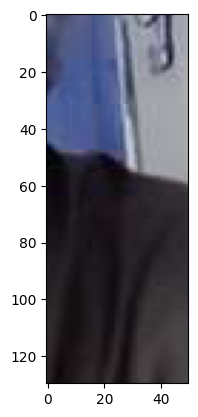

In [ ]:
plt.imshow(frame[120:120+250,200:200+250, :])

In [ ]:
# connect to the webcam
cap  = cv2.VideoCapture(1)
cv2.namedWindow('Image Collection', cv2.WINDOW_NORMAL)

while cap.isOpened():
    ret, frame = cap.read()

    # cut down frame
    frame = frame[120:120+250,200:200+250, :]

    # show image back to the screen
    cv2.imshow('Image Collection', frame)

    # break gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break

# release the webcam
cap.release()
cv2.destroyAllWindows()

so, when we run plt.imshow(frame) we get

![output250x250.png](attachment:output250x250.png)

To collect anchor and positive images, we're implementing the following scheme:

- On hitting 'a', an anchor image is collected.
- On hitting 'p', a positive image is collected.
- Each image should possess a unique filename, facilitated by the `uuid` module (universally unique identifier).

In [ ]:
import uuid
'{}.jpg'.format(uuid.uuid1())

'21301de2-44c4-11ee-b348-2c27d73c66d3.jpg'

In [ ]:
# connect to the webcam
cap  = cv2.VideoCapture(1)
cv2.namedWindow('Image Collection', cv2.WINDOW_NORMAL)

while cap.isOpened():
    ret, frame = cap.read()

    # cut down frame
    frame = frame[120:120+250,200:200+250, :]

    # collect anchors
    if cv2.waitKey(1) & 0XFF == ord('a'):
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(imgname, frame)

    # collect positives
    if cv2.waitKey(1) & 0XFF == ord('p'):
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(imgname, frame)

    # show image back to the screen
    cv2.imshow('Image Collection', frame)

    # break gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break

# release the webcam
cap.release()
cv2.destroyAllWindows()

Feel free to adjust the order of the if statements if positive image collection is relatively slower. For a smooth exit, you can press and hold the 'q' key. Aim to collect around 300-500 images for both anchor and positive classes.

# 3 Load and Preprocess Images


if all worked out well you should have mugshots of yourself and labeled images in the negative directory
wat we will do here is preprocess the images, create positive and negative samples, then load the images into tensorflow dataloader

## 3.1 Get Image Directories


we want tensorflow to grab 300 images paths from anc, pos and neg directories
we are grabing 300 random filepaths from each directory and passing it through tf data pipeline

In [14]:
os.listdir(ANC_PATH)

['cd00e03b-44c6-11ee-8fe7-2c27d73c66d3.jpg',
 'cd102c64-44c6-11ee-a35e-2c27d73c66d3.jpg',
 'c8f7c509-44c6-11ee-b528-2c27d73c66d3.jpg',
 'c9eaa1fe-44c6-11ee-9c61-2c27d73c66d3.jpg',
 'cabdc4ed-44c6-11ee-8d41-2c27d73c66d3.jpg',
 'cda04323-44c6-11ee-adff-2c27d73c66d3.jpg',
 'cd818646-44c6-11ee-83d6-2c27d73c66d3.jpg',
 'cd48b198-44c6-11ee-9ac6-2c27d73c66d3.jpg',
 'c5b922a0-44c6-11ee-951a-2c27d73c66d3.jpg',
 'c9696bc5-44c6-11ee-a8a5-2c27d73c66d3.jpg',
 'c9980c97-44c6-11ee-8691-2c27d73c66d3.jpg',
 'c96e86fe-44c6-11ee-a54d-2c27d73c66d3.jpg',
 'ca6b895f-44c6-11ee-bba9-2c27d73c66d3.jpg',
 'ca140862-44c6-11ee-b4b4-2c27d73c66d3.jpg',
 'ce88cd1f-44c6-11ee-851c-2c27d73c66d3.jpg',
 'c9f4fd32-44c6-11ee-b9cc-2c27d73c66d3.jpg',
 '5c583905-44c5-11ee-8917-2c27d73c66d3.jpg',
 'c916b364-44c6-11ee-9f24-2c27d73c66d3.jpg',
 'cf1977aa-44c6-11ee-b570-2c27d73c66d3.jpg',
 'd0444c49-44c6-11ee-ac0d-2c27d73c66d3.jpg',
 'cac827d3-44c6-11ee-b9b1-2c27d73c66d3.jpg',
 'cb9c41c4-44c6-11ee-96e3-2c27d73c66d3.jpg',
 'c8e84953

In [15]:
anchor = tf.data.Dataset.list_files(ANC_PATH+'/*.jpg').take(300)
positive = tf.data.Dataset.list_files(POS_PATH+'/*.jpg').take(300)
negative = tf.data.Dataset.list_files(NEG_PATH+'/*.jpg').take(300)

to test, you can use this:
```python
dir_test = anchor.as_numpy_iterator()
print(dir_test.next())
dir_test = positive.as_numpy_iterator()
print(dir_test.next())
dir_test = negative.as_numpy_iterator()
print(dir_test.next())
```

```console
b'data\\anchor\\54b8dc16-44c5-11ee-b502-2c27d73c66d3.jpg'
b'data\\positive\\9011249f-44c6-11ee-8d35-2c27d73c66d3.jpg'
b'data\\negative\\Alan_Ball_0001.jpg'
```

In [16]:
dir_test = anchor.as_numpy_iterator()
print(dir_test.next())
dir_test = positive.as_numpy_iterator()
print(dir_test.next())
dir_test = negative.as_numpy_iterator()
print(dir_test.next())

b'data/anchor/c6162133-44c6-11ee-80ff-2c27d73c66d3.jpg'
b'data/positive/93e5c62b-44c6-11ee-bdc5-2c27d73c66d3.jpg'
b'data/negative/Andy_Roddick_0008.jpg'


## 3.2 Preprocessing - Scale and Resize


we want to scale and resize each of the 900 images to be able to fit into tensor ie for easier cpu run.
so, we let tf read the image, decode the image, resize the image to 100*100 then divide each pixel by 255 to only have values in the range(0,1)

In [17]:
def preprocess(file_path):
    byte_img = tf.io.read_file(file_path)
    img = tf.io.decode_jpeg(byte_img)
    img = tf.image.resize(img, (100, 100))
    img = img / 255.0
    return img

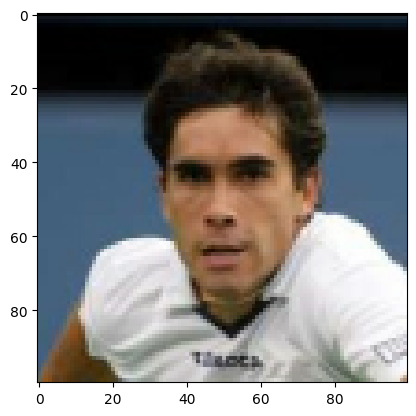

In [18]:
img = preprocess('data/negative/Ramon_Delgado_0001.jpg')
plt.imshow(img)

## 3.3 Create Labeled Datasets



We're setting up our labeled datasets in line with our requirement:

- `anchor + positive` should result in a label of `1`
- `anchor + negative` should result in a label of `0`


In [19]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In this code:
- We're using `tf.data.Dataset.zip` to combine anchor images, positive images, and a dataset of ones for positive labels.
- Similarly, we're combining anchor images, negative images, and a dataset of zeros for negative labels.
- `data` is formed by concatenating `positives` and `negatives`.

We can now explore the content of the dataset using the following code:

In [20]:
samples = data.as_numpy_iterator()
example = samples.next()
example

(b'data/anchor/53accd3f-44c5-11ee-8543-2c27d73c66d3.jpg',
 b'data/positive/90cae415-44c6-11ee-8f0d-2c27d73c66d3.jpg',
 1.0)

## 3.4 build, train and test partition

We need to preprocess both images and concatenate them into a single data entry. A preprocessing function `preprocess_twin` is defined to achieve this:

In [21]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

We're processing input images and validation images (anchor images), associating them with their corresponding labels. Positive images are assigned a label of `1.0`, while negative images have a label of `0.0`.

After that, we proceed to build our data pipeline:

In [22]:
# building the pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024)

- `map` applies the `preprocess_twin` function to all data entries.
- `cache` stores the preprocessed data in memory to speed up training.
- `shuffle` randomly shuffles the data entries to enhance training diversity.

We then set up training and validation/testing partitions:

In [23]:
# training partiton
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

- `take` gets 70% of the data for training.
- `batch` groups data into batches of size 16.
- `prefetch` loads batches ahead of time to optimize training.

if we check our `train_data`, we now have this
```console
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None),
TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None),
TensorSpec(shape=(None,), dtype=tf.float32, name=None))>
```
which means that we have  a positive image of 100*100*1, anchor image of 100*100*1 and a label of size 1

In [24]:
# validation /testing aprtition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

- `skip` skips the training data and starts from where training left off.
- `take` gets 30% of the data for validation/testing.
- `batch` groups validation/testing data into batches.
- `prefetch` preloads batches for efficient evaluation.

# 4. Model Engineering


we are going to build an embedding layer that conversta raw image into data readable by neural network
building an l1 distance layer that checks whether the pair of embeddings are similar enough
we will then compile the embedding layers together

## 4.1 Building Embedding Layer


![Screenshot 2023-08-28 180237.png](<attachment:Screenshot 2023-08-28 180237.png>)

In [25]:
def make_embedding():

    # input layer
    inp = Input(shape=(100,100,3))

    # convolution + ReLU layer 1
    c1 = Conv2D(64, (10,10), activation='relu')(inp)

    # max pooling layer 1
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

    # convolution + ReLU layer 2
    c2 = Conv2D(128, (7,7), activation='relu')(m1)

    # max pooling layer 2
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

    # convolution + ReLU layer 3
    c3 = Conv2D(128, (4,4), activation='relu')(m2)

    # max pooling layer 3
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

    # convolution + relu layer 4
    c4 = Conv2D(256, (4,4), activation='relu')(m3)

    # fully connected + sigmoid
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation = 'sigmoid')(f1)

    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [26]:
embedding = make_embedding()

In [27]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 46, 46, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 128)       26

The embedding layer is a fundamental component of the Siamese network that converts raw input images into data suitable for neural network processing. This layer is constructed through a series of convolutional and pooling operations. Let's break down the process:

1. **Input Layer:** The process begins with an input layer that takes images with dimensions of 100x100x3 (100x100 pixels and 3 color channels: RGB).

2. **Convolution and ReLU Layer 1:** A convolutional layer with 64 filters of size 10x10 is applied to the input. The ReLU activation function is used to introduce non-linearity.

3. **Max Pooling Layer 1:** Max pooling with a 2x2 window and 'same' padding is performed on the output of the first convolutional layer, resulting in a reduction in spatial dimensions.

4. **Convolution and ReLU Layer 2:** Another convolutional layer with 128 filters of size 7x7 is applied, followed by the ReLU activation function.

5. **Max Pooling Layer 2:** Similar to the previous step, max pooling with a 2x2 window and 'same' padding is carried out.

6. **Convolution and ReLU Layer 3:** A third convolutional layer with 128 filters of size 4x4 is applied, again followed by the ReLU activation function.

7. **Max Pooling Layer 3:** Once more, max pooling with a 2x2 window and 'same' padding is performed.

8. **Convolution and ReLU Layer 4:** A final convolutional layer with 256 filters of size 4x4 is applied.

9. **Flatten and Fully Connected Layer:** The output of the fourth convolutional layer is flattened to a vector. This vector is then passed through a fully connected layer with 4096 units, using the sigmoid activation function.

10. **Model Summary:** The entire embedding layer is wrapped in a `Model` with the input as the raw image and the output as the resulting embedding. The summary of the model architecture is displayed, showing the layers, output shapes, and parameters.

```console
Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 input_6 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_13 (Conv2D)          (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 46, 46, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 20, 20, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 17, 17, 128)       262272    
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 9, 9, 128)         0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 6, 6, 256)         524544    
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 4096)              37752832  
                                                                 
=================================================================
Total params: 38960448 (148.62 MB)
Trainable params: 38960448 (148.62 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
```

this effectively forms our embedding

## 4.2 Building Distance Layer


In this section, we'll create a custom layer called the L1 distance layer. This layer calculates the L1 distance (also known as Manhattan distance) between two embeddings: the input embedding and the validation embedding.

In [28]:
# L1 distance layer
class L1Dist(Layer):
    def __init__(self, **kwargs):
        super().__init__()

    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

The L1 distance measures the absolute difference between the elements of the two embeddings. It's a simple yet effective way to quantify the dissimilarity between embeddings.

The custom layer is implemented as a class called `L1Dist`. Inside the `call` method, the absolute difference between the input_embedding and the validation_embedding is calculated using TensorFlow operations. This results in a distance tensor that indicates how different the two embeddings are.

## 4.3 Make Siamese Model

In this section, we will create the Siamese model using the architecture described in the paper. The Siamese model takes a pair of input images (input image and validation image) and processes them through the embedding layer, followed by the L1 distance layer, and finally the classification layer.

In [29]:
def make_siamese_model():

    # Handle inputs
    input_image = Input(name='input_img', shape=(100,100,3))
    validation_image = Input(name='validation_img', shape=(100,100,3))

    # combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))

    # classification layer
    classifier = Dense(1, activation='sigmoid')(distances)

    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

Here's a breakdown of the process:

1. Define the input images: The Siamese model takes two input images, namely input_img and validation_img, both with shape (100, 100, 3), representing images of size 100x100 with 3 color channels.

2. Process through embedding: Pass both input images through the previously defined embedding architecture (from the `make_embedding` function) to obtain their respective embeddings.

3. Calculate distances: Use the L1 distance layer to calculate the distance between the two embeddings obtained from the previous step. This will result in a single distance value.

4. Classification layer: Pass the distance value through a dense layer with sigmoid activation to obtain the final output. This output will be close to 1 if the two input images are similar and close to 0 if they are dissimilar.

5. Create the model: Combine all the components into a Keras model using the Model class.

In [30]:
#testing the model
siamese_model = make_siamese_model()
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

# 5. Training


We will be going through five steps to train our Siamese neural network:

1. Set up a loss function for our Siamese neural network.
2. Set up an optimizer for backpropagation.
3. Build a custom training step that handles multiple inputs.
4. Create a training loop blend.
5. Train the model.

## 5.1 Setup Loss and Optimizer


in our case, we need to measure the similarity between pairs of images. thuis is where binary cross entropy comes in. it can be used to measure difference of true labels in our binary classification problem

In [31]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [32]:
opt = tf.keras.optimizers.Adam(1e-4)

## 5.2 Establish Checkpoints


In [33]:
!mkdir training_checkpoints
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

In [34]:
os.listdir(checkpoint_dir)

[]

## 5.3 Build Trainstep Function


In [35]:
@tf.function
def train_step(batch):
    with tf.GradientTape() as tape:
        # get anchor and positive / negative image
        X = batch[:2]
        # get label
        y = batch[2]

        # forward pass
        yhat = siamese_model(X, training=True)

        # calculate data
        loss = binary_cross_loss(y, yhat)
    print(loss)

    # calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)

    # calculate updated weights and apply siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))

    return loss

In [36]:
test_batch = train_data.as_numpy_iterator()
batch_1 = test_batch.next()
len(batch_1)
len(batch_1[0])
len(batch_1[2])

16

In [37]:
num = [1,2,3,4,5]
num[:2]

[1, 2]

In [38]:
X = batch_1[:2]

function of @tf.functio is to compile a function into a callable tf graph
tf.gradienttape is used to perform differenciation
 if we cheack our train data example, using

```python
test_batch = train_data.as_numpy_iterator()
batch_1 = test_batch.next()
```
we find that batch_[0] has 16 images, batch_1[1] has 16 images and batch_1[2] contains labels of each pair of images

x= batch[:2] is used to slice the first two values ie we are picking the first two values
y = batch[2] means we are picking out the labels values array
we are thwn using the x values to train the siamese model and make prediction savesd as yhat
then we calculate our loss using binary_cross_loss ie loss betweenpredicted outputs (yhat) and actual labels (y)
grad calculates gradient of loss with respect to the trainable variables
- `opt.apply_gradients(zip(grad, siamese_model.trainable_variables))`: Updates the model's trainable variables using the calculated gradients and the chosen optimizer (`opt`). The `zip(grad, siamese_model.trainable_variables)` pairs each gradient with its corresponding trainable variable.



## 5.4 Build Training Loop


In [39]:
def train(data, EPOCHS):
    # loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))

        # loop through each batch
        for idx, batch in enumerate(data):
            # run train step here
            train_step(batch)
            progbar.update(idx + 1)

        # save checkpoints
        if epoch % 10 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

this is effectively looping through every batch in the dataset
we will loop through every epoch, note which epoch we are upto and defined a progress bar

we then loop through every batch to give us a counter and the actual batch itself. so every time we run a batch, we will update our progress bar
 finally we save our checkpoint after every 10 epochs

Think of an epoch as a complete cycle of learning for a machine learning model. It's like going through all the lessons in a textbook one time. During an epoch, the model learns from examples in the training data and adjusts itself to get better at making predictions. Doing more epochs is like studying the same textbook multiple times to understand it better. But just like studying too much can be tiring, training too many epochs can lead to problems. It's important to find the right balance to make the model learn well without getting overwhelmed.

## 5.5 Train the Model

In [40]:
epochs = 50
train(train_data, epochs)


 Epoch 1/50
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
27/27 [==============================] - 20s 203ms/step

 Epoch 2/50
27/27 [==============================] - 4s 171ms/step

 Epoch 3/50
27/27 [==============================] - 5s 172ms/step

 Epoch 4/50
27/27 [==============================] - 5s 172ms/step

 Epoch 5/50
27/27 [==============================] - 5s 171ms/step

 Epoch 6/50
27/27 [==============================] - 4s 172ms/step

 Epoch 7/50
27/27 [==============================] - 5s 171ms/step

 Epoch 8/50
27/27 [==============================] - 4s 170ms/step

 Epoch 9/50
27/27 [==============================] - 4s 171ms/step

 Epoch 10/50
27/27 [==============================] - 4s 171ms/step

 Epoch 11/50
27/27 [==============================] - 5s 176ms/step

 Epoch 12/50
27/27 [==============================] - 5s 172ms/step

 Epoch 13/50
27/27 [=====

this took a toll on my machne(no gpu) so i used google colab from here on out

In [41]:
!ls

data  data.zip	drive  sample_data  train_checkpoints  training_checkpoints


In [42]:
!cp /content/drive/MyDrive/Colab\ Notebooks/ /content/drive/MyDrive/Facial\ Recognition

cp: -r not specified; omitting directory '/content/drive/MyDrive/Colab Notebooks/'


# 6. Evaluate the model

we are going to be using two key metrics which are presicion and recoil

precision: "Of all instances predicted as positive, how many were actually positive?
precision is used to measure the propotion of correctly predicted positives instances among all positive instances(true positives + false positives)

recall: Of all actual positive instances, how many were correctly predicted as positive
recall is used to measure the propotion of true positives among all atual positive instances(true positives + false negatives)

nb: a higher number is a good number


## 6.1 import metrics

In [43]:
# import metrics
from tensorflow.keras.metrics import Precision, Recall

we are going to use our test data for metrics
we use
test_input to capture the input images batch remember a batch has 16 images
test_val to capture the anchor/validation images batch
ytrue to captur the labels after paring

## 6.2 make predictions

In [44]:
# get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [45]:
# make predictions
y_hat = siamese_model.predict([test_input, test_val])
y_hat

1/1 [==============================] - 0s 158ms/step


array([[3.8904647e-14],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.9774224e-13],
       [1.0000000e+00],
       [9.9863213e-01],
       [1.4622736e-13],
       [1.5508222e-12],
       [9.9980968e-01],
       [1.5201151e-13],
       [2.9244315e-13],
       [8.6064107e-12],
       [9.9900216e-01],
       [3.2766772e-09],
       [9.9626946e-01],
       [2.3565873e-14]], dtype=float32)

In [46]:
# post processing the results

[1 if prediction > 0.5 else 0 for prediction in y_hat]

[0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0]

In [47]:
y_true

array([0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.],
      dtype=float32)

## 6.3 calculate metrics

In [48]:
# creating a metric object
m = Precision()

# calculating the precision value
m.update_state(y_true, y_hat)

# return result
m.result().numpy()

1.0

In [49]:
# creating a metric object
m = Recall()

# calculating the recall value
m.update_state(y_true, y_hat)

# return result
m.result().numpy()

1.0

## 6.4 visualize results

so, we are first setting up our graph paper, setting subplots to host both images ie number of rows, number of columns and index of image

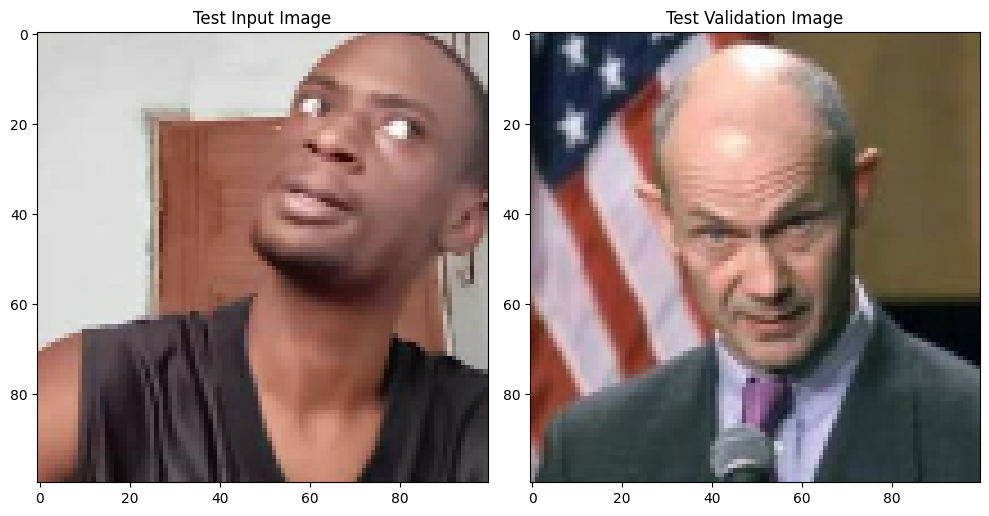

In [50]:
# Set plot size
plt.figure(figsize=(10, 8))

# Image 1
plt.subplot(1, 2, 1)
plt.imshow(test_input[15])
plt.title('Test Input Image')

# Image 2
plt.subplot(1, 2, 2)
plt.imshow(test_val[15])
plt.title('Test Validation Image')

# Render the plot
plt.tight_layout()
plt.show()

# 7. Save model

In [51]:
# save weights
siamese_model.save('siamesemodel.h5')

since our model is unique we have to customize it a little bit
tf.keras.models.load_model allows us to load our model
we then pass the name of our model
we then load our custom objects ie the L1 distance layer and binarycrossentropy

In [52]:
# reload model
model = tf.keras.models.load_model('siamesemodel.h5',
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [53]:
# load model
model.predict([test_input, test_val])

1/1 [==============================] - 0s 176ms/step


array([[3.8904647e-14],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.9774224e-13],
       [1.0000000e+00],
       [9.9863213e-01],
       [1.4622736e-13],
       [1.5508222e-12],
       [9.9980968e-01],
       [1.5201151e-13],
       [2.9244315e-13],
       [8.6064107e-12],
       [9.9900216e-01],
       [3.2766772e-09],
       [9.9626946e-01],
       [2.3565873e-14]], dtype=float32)

The warning message you're seeing indicates that the loaded model was not compiled because there was no training configuration found in the saved file. In this case, you will need to manually compile the loaded model before using it for training or evaluation.

In [54]:
model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

since file too large ie model, use this to push it https://docs.github.com/en/repositories/working-with-files/managing-large-files/configuring-git-large-file-storage

# 8. real time test

we are going to be focused on
setting up images for positive and negative images
build verification function
use opencv inreal time face verification
in the verification function we will set up a verification threshold where an image will be said to be either positive(if above) or negative(if below)
the threshold will be tunable by the user

we will access our wbcam using opencv, fetch input images and hold them inside of a folder, compare them against a folder of positive images

In [6]:
# create a folder for hosting verification images and input images
!mkdir application_data
os.listdir()

mkdir: cannot create directory ‘application_data’: File exists


['.config',
 'drive',
 'siamesemodel.h5',
 'train_checkpoints',
 'application_data',
 'training_checkpoints',
 'data',
 'data.zip',
 'sample_data']

In [7]:
!cd application_data && mkdir verification_images input_image
os.listdir('application_data')

mkdir: cannot create directory ‘verification_images’: File exists
mkdir: cannot create directory ‘input_image’: File exists


['input_image', 'verification_images']

copying 50 random images from positive images to verification_images.
we are going to be looping over 50 different samples of images

## 8.1 Verification Function

In [1]:
def verify(frame, model, detection_threshold, verification_threshold):
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))

        result = model.predict(list(np.expand_dims([input_img, validation_img], axis = 1)))
        results.append(result)

    detection = np.sum(np.array(results) > detection_threshold)
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images')))
    verified = verification > verification_threshold

    return results, verified

so far what we have done is
we will pass the input image as frame, siamese neural network as model, detection threshold is the metric above which a prediction is considered positive and verification threshold is the ppropotion of positive predictions / total positve samples
we then loop though all the images inside our application data/verification_images then:
preprocess input image and verification mage. remember input image will always be 1

we then pass the images as a list to our model byencapsulating it in a numpy array
we use expand_dims to compare each input image numpy array against each verification image then capture the result as result and pass it to results array
we wrap it inside of a list since we have only one input image against multiple verification images

we then calculate detection,
verification ie detection/ no of verified images
verified ie verification / verification threshold



## 8.2 OpenCV Real time verification

In [ ]:
# connect to the webcam
cap  = cv2.VideoCapture(1)
cv2.namedWindow('Image Collection', cv2.WINDOW_NORMAL)

while cap.isOpened():
    ret, frame = cap.read()

    # cut down frame
    frame = frame[120:120+250,200:200+250, :]

    # show image back to the screen
    cv2.imshow('Image Collection', frame)

    # break gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break

# release the webcam
cap.release()
cv2.destroyAllWindows()